# **Intelligence Artificielle - TP initiation**

Nous allons travailler sur des données disponibles publiquement en ligne pour explorer l'apprentissage automatique (machine learning). 
Les données correspondent à des analyses d'images cytologiques obtenues à partir d'une aspiration avec une aiguille fine à partir de masses détectées dans le sein de patientes. La but est donc de prédire si ces masses sont bénignes ou malignes (ie cancers du sein). 

Exemple d'images utilisées : 

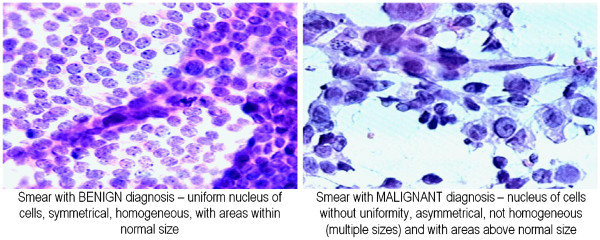

Un système automatisé d'analyse d'images a permis d'extraire des paramêtres numériques et ce sont ceux ci que nous allons utilisés. 

Vous aurez au cours de ce TP 3 questions (cadre orange) pour lesquelles les réponses sont attendues sur moodle (Quiz intro IA) et qui serviront dans le cadre de votre évaluation pour cet UE3 (contrôle continue). 


**Plan du TP :**

**I. Load Data**  
**II. Explore Data**  
**III. Decision Tree**  
**IV. Random Forest**

**Conclusion**



<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

## I - Load Data

Nous allons tout d'abord charger les données sous forme d'un tableau (les titres des colonnes sont dans un fichier séparé). 

In [ ]:
# Load data and their names
breastCancerData = read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
             sep=",")
breastCancerData = as.data.frame(breastCancerData)
breastCancerDataColNames = read.table("https://raw.githubusercontent.com/fpsom/2020-07-machine-learning-sib/master/data/wdbc.colnames.csv",
                                    sep="\n")
breastCancerDataColNames

In [ ]:
# Visualiser les premières lignes de vos données
head(breastCancerData)

In [51]:
# Visualiser les noms de colonnes
breastCancerDataColNames

V1
<chr>
ID
Diagnosis
Radius.Mean
Texture.Mean
Perimeter.Mean
Area.Mean
Smoothness.Mean
Compactness.Mean
Concavity.Mean


In [32]:
# Ajouter le nom des colonnes à votre tableau
colnames(breastCancerData) = breastCancerDataColNames[,]

In [ ]:
# Quelles sont les dimensions de votre tableau
dim(breastCancerData)

In [44]:
# Combien avez vous de patientes avec un diagnostic "B" (benin)
sum(breastCancerData$Diagnosis=='B')

[1] 357

In [43]:
# Combien avez vous de patientes avec un diagnostic de tumeur maligne "M"
sum(breastCancerData$Diagnosis=="M")

[1] 212

In [45]:
# Faites du diagnostic un facteur
breastCancerData$Diagnosis <- as.factor(breastCancerData$Diagnosis)

In [46]:
# retirer la colonnes correspondant au numéro d'identification des patientes
breastCancerDataNoID <- breastCancerData[2:ncol(breastCancerData)]


# II - Explorer les données

Nous allons maintenant regarder les données d'un peu plus près pour nous familiariser avec elles et potentiellement décider lesquelles sont les plus pertinentes. 

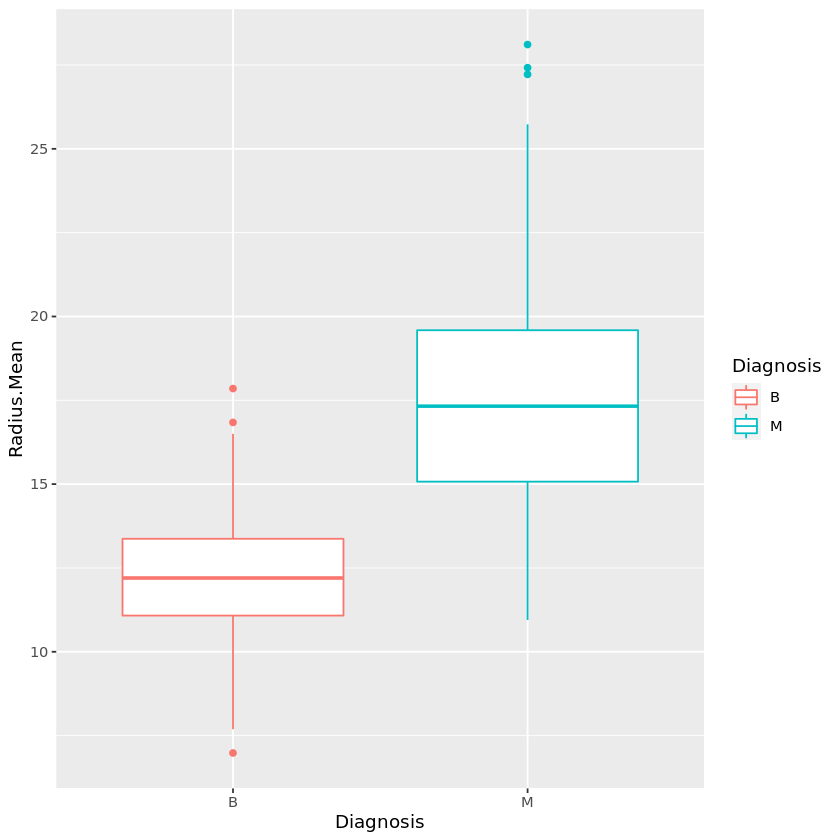

In [67]:
# Faire un boxplot avec le paramêtre Radius.Mean pour comparer les B et les M
ggplot(breastCancerDataNoID, aes(Diagnosis, Radius.Mean, color = Diagnosis)) + geom_boxplot()

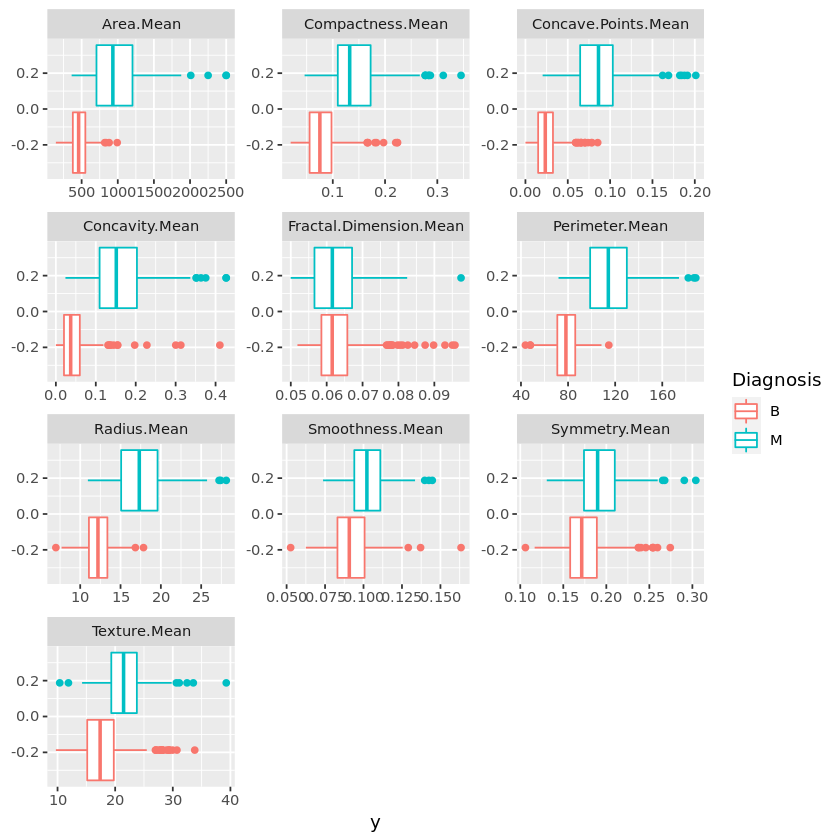

In [70]:
# Visualiser plusieurs boxplot d'un coup
gather(breastCancerDataNoID, x, y, Radius.Mean:Fractal.Dimension.Mean) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [73]:
library(caret)
# Center & scale data
ppv <- preProcess(breastCancerDataNoID, method = c("center", "scale"))
breastCancerDataNoID_tr <- predict(ppv, breastCancerDataNoID)

In [74]:
# Summarize first 5 columns of the original data
breastCancerDataNoID[1:5] %>% summary()

 Diagnosis  Radius.Mean      Texture.Mean   Perimeter.Mean     Area.Mean     
 B:357     Min.   : 6.981   Min.   : 9.71   Min.   : 43.79   Min.   : 143.5  
 M:212     1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17   1st Qu.: 420.3  
           Median :13.370   Median :18.84   Median : 86.24   Median : 551.1  
           Mean   :14.127   Mean   :19.29   Mean   : 91.97   Mean   : 654.9  
           3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10   3rd Qu.: 782.7  
           Max.   :28.110   Max.   :39.28   Max.   :188.50   Max.   :2501.0  

In [75]:
# Summarize first 5 columns of the re-centered and scaled data
breastCancerDataNoID_tr[1:5] %>% summary()

 Diagnosis  Radius.Mean       Texture.Mean     Perimeter.Mean   
 B:357     Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 M:212     1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
           Median :-0.2149   Median :-0.1045   Median :-0.2358  
           Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
           3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
           Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  
   Area.Mean      
 Min.   :-1.4532  
 1st Qu.:-0.6666  
 Median :-0.2949  
 Mean   : 0.0000  
 3rd Qu.: 0.3632  
 Max.   : 5.2459  

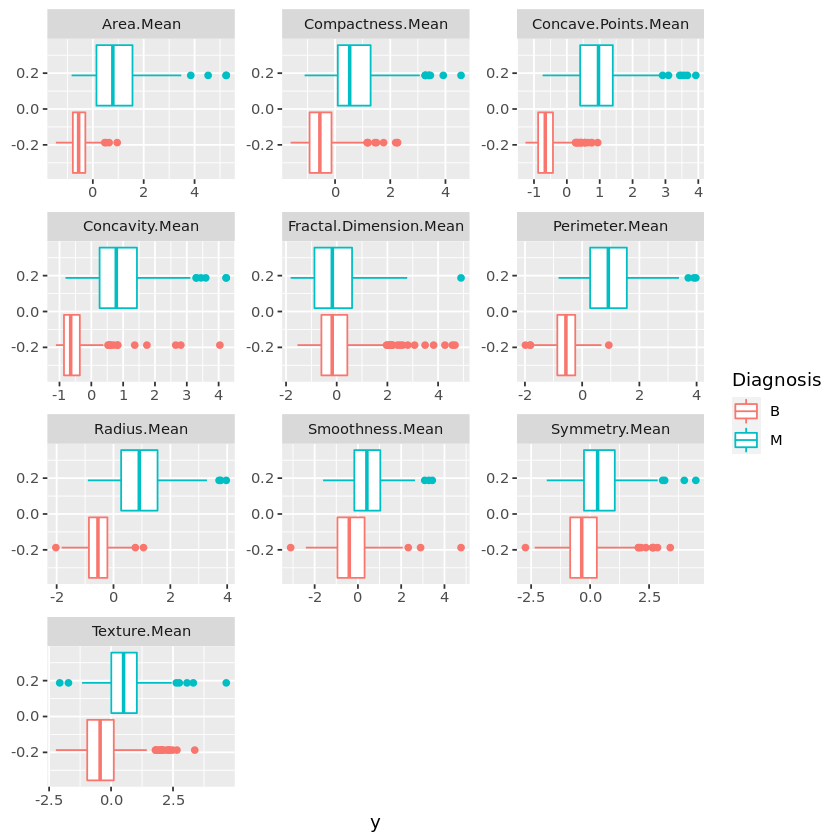

In [76]:
# Visualiser à nouveau plusieurs boxplot d'un coup à partir des données centrées
gather(breastCancerDataNoID_tr, x, y, Radius.Mean:Fractal.Dimension.Mean) %>%
  ggplot(aes(x = y, color = Diagnosis)) +
    geom_boxplot() +
    facet_wrap( ~ x, scales = "free", ncol = 3)

In [ ]:
# vérifier si les variables sont fortement corrélées entre elles
#AA FAIRE

In [ ]:
# Faire des tests statistiques pour voir les paramêtres les plus prometteurs
##A FAIRE

# III - Decision Tree

In [79]:
library(rpart)
#install.packages("rpart.plot")
#library(rpart.plot)

Warning message in install.packages("rpart.plot"):
“'lib = "/srv/conda/envs/notebook/lib/R/library"' is not writable”


ERROR: Error in install.packages("rpart.plot"): unable to install packages


In [80]:
# split into training and test subsets
set.seed(1000)
ind <- sample(2, nrow(breastCancerDataNoID), replace=TRUE, prob=c(0.7, 0.3))
breastCancerData.train <- breastCancerDataNoID[ind==1,]
breastCancerData.test <- breastCancerDataNoID[ind==2,]

In [83]:
# Construire un modèle avec 3 paramètres
myFormula <- Diagnosis ~ Radius.Mean + Area.Mean + Texture.SE

breastCancerData.model <- rpart(myFormula,
                                method = "class",
                                data = breastCancerData.train,
                                minsplit = 10,
                                minbucket = 1,
                                maxdepth = 3,
                                cp = -1)

#The parameters that we used reflect the following aspects of the model:
#    minsplit: the minimum number of instances in a node so that it is split
#    minbucket: the minimum allowed number of instances in each leaf of the tree
#    maxdepth: the maximum depth of the tree
#    cp: parameter that controls the complexity for a split and is set intuitively (the larger its value, the more probable to apply pruning to the tree)


print(breastCancerData.model$cptable)
#rpart.plot(breastCancerData.model)
table(predict(breastCancerData.model, type="class"), breastCancerData.train$Diagnosis)


            CP nsplit rel error    xerror       xstd
1  0.709459459      0 1.0000000 1.0000000 0.06469979
2  0.016891892      1 0.2905405 0.3040541 0.04262349
3  0.006756757      3 0.2567568 0.3175676 0.04343356
4  0.000000000      4 0.2500000 0.3108108 0.04303179
5 -1.000000000      6 0.2500000 0.3108108 0.04303179


   
      B   M
  B 223  19
  M  18 129

In [82]:
# Try to make a better model

opt <- which.min(breastCancerData.model$cptable[, "xerror"])
cp <- breastCancerData.model$cptable[opt, "CP"]
# prune tree
breastCancerData.pruned.model <- prune(breastCancerData.model, cp = cp)
# plot tree
#rpart.plot(breastCancerData.pruned.model)

table(predict(breastCancerData.pruned.model, type="class"), breastCancerData.train$Diagnosis)

   
      B   M
  B 233  35
  M   8 113

In [ ]:
# Test the model on test set
## make prediction
BreastCancer_pred <- predict(breastCancerData.pruned.model, newdata = breastCancerData.test, type="class")
plot(BreastCancer_pred ~ Diagnosis, data = breastCancerData.test,
     xlab = "Observed",
     ylab = "Prediction")
table(BreastCancer_pred, breastCancerData.test$Diagnosis)


In [ ]:
# print AUC ? 

## IV - Random Forest